# 🏗️ Build-Up Week 2
> EPOCH 3기 한우림

> 2025.09.01. Mon

> 데싸노트의 실전에서 통하는 머신러닝

# 🪵 05장 로지스틱 회귀

## 5.1 문제 정의: 한눈에 보는 예측 목표
- 타이타닉 데이터셋: 1912년 4월 10일 빙산과 충돌하여 침몰한 여객선 타이타닉에 승선한 승객의 정보를 담은 데이터셋
- 이름, 성별, 나이, 티켓 번호 등을 활용해 승객의 생존 여부 예측하기

## 5.2 라이브러리 및 데이터 불러오기

In [6]:
import pandas as pd
file_url = 'https://media.githubusercontent.com/media/musthave-ML10/data_source/main/titanic.csv'
data = pd.read_csv(file_url)

## 5.3 데이터 확인하기

In [7]:
data.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Embarked,Survived
0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,S,0
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,C,1
2,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,S,1
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,S,1
4,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,S,0


- Pclass: 티켓 클래스
- Name: 승객 이름
- Sex: 성별
- Age: 나이
- SibSp: 함께 탑승한 형제, 배우자의 수
- Parch: 함께 탑승한 부모, 자녀의 수
- Ticket: 티켓 번호
- Embarked: 승선한 항구 (C=Cherbourg, Q=Queenstown, S=Southampton)
- Survived: 생존 유무 (1=생존, 0=사망)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 889 entries, 0 to 888
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    889 non-null    int64  
 1   Name      889 non-null    object 
 2   Sex       889 non-null    object 
 3   Age       889 non-null    float64
 4   SibSp     889 non-null    int64  
 5   Parch     889 non-null    int64  
 6   Ticket    889 non-null    object 
 7   Embarked  889 non-null    object 
 8   Survived  889 non-null    int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 62.6+ KB


- 889개의 로우, 9개의 컬럼
- null 없음 (결측치 없음)
- 문자형 변수(object): `Name`, `Sex`, `Ticket`, `Embarked`
- 숫자형 변수(int, float): `Pclass`, `Age`, `SibSp`, `Parch`, `Survived`

In [9]:
data.describe()

,Pclass,Age,SibSp,Parch,Survived
count,889.000000,889.000000,889.000000,889.000000,889.000000
mean,2.311586,29.315152,0.524184,0.382452,0.382452
std,0.834700,12.984932,1.103705,0.806761,0.486260
min,1.000000,0.420000,0.000000,0.000000,0.000000
25%,2.000000,22.000000,0.000000,0.000000,0.000000
50%,3.000000,28.000000,0.000000,0.000000,0.000000
75%,3.000000,35.000000,1.000000,0.000000,1.000000
max,3.000000,80.000000,8.000000,6.000000,1.000000


숫자형 변수들에 대한 요약통계량 - 모두 889개의 값을 가짐
- `Pclass`: mean이 높고, 50% quantile 값이 3인 것을 보면 1, 2, 3의 클래스 중 3의 비중이 더 높을 것으로 추정
- `Age`: 25%, 75% quantile의 값을 통해 젊은 층이 많다는 것을 알 수 있음 min이 0.42? 태어난 지 얼마 안 된 아기도 있고, max가 80으로 고령의 승객도 존재
- `SibSp`, `Parch`: 0이 많은 것을 보면 가족 동반보다는 혼자 탑승한 승객의 비중이 크다는 것을 알 수 있음

In [10]:
# 상관관계 출력
data.corr()

ValueError: could not convert string to float: 'Braund, Mr. Owen Harris'

Error: `ValueError: could not convert string to float: 'Braund, Mr. Owen Harris'`\
pandas 버전이 업그레이드되면서 문자형 변수를 자동으로 숫자형으로 변환해 주지 않음 -> `numeric_only=True` 추가

In [11]:
data.corr(numeric_only=True)

,Pclass,Age,SibSp,Parch,Survived
Pclass,1.000000,-0.336512,0.081656,0.016824,-0.335549
Age,-0.336512,1.000000,-0.232543,-0.171485,-0.069822
SibSp,0.081656,-0.232543,1.000000,0.414542,-0.034040
Parch,0.016824,-0.171485,0.414542,1.000000,0.083151
Survived,-0.335549,-0.069822,-0.034040,0.083151,1.000000


In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

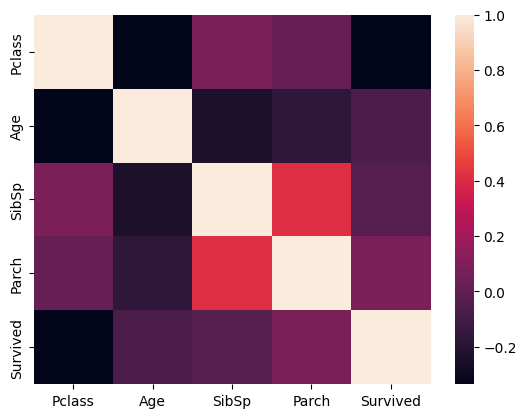

In [13]:
sns.heatmap(data.corr(numeric_only=True)) # 마찬가지로 `numeric_only=True` 추가해야 함
plt.show() # matplotlib, seaborn이 최근 버전일 경우 생략 가능

<Axes: >

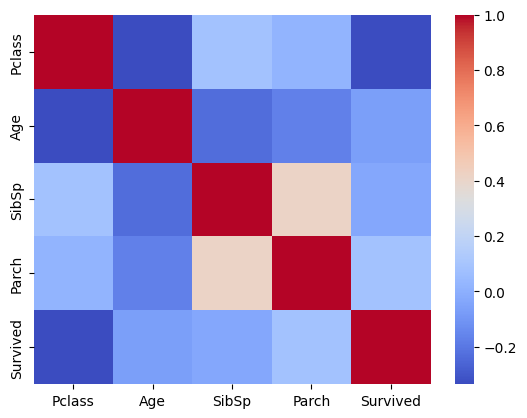

In [14]:
sns.heatmap(data.corr(numeric_only=True), cmap='coolwarm') # 색상 변경

<Axes: >

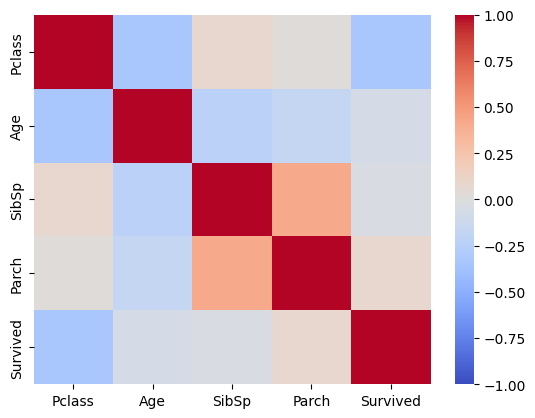

In [15]:
sns.heatmap(data.corr(numeric_only=True), cmap='coolwarm', vmin=-1, vmax=1) # 범례를 1부터 -1까지로 수정

<Axes: >

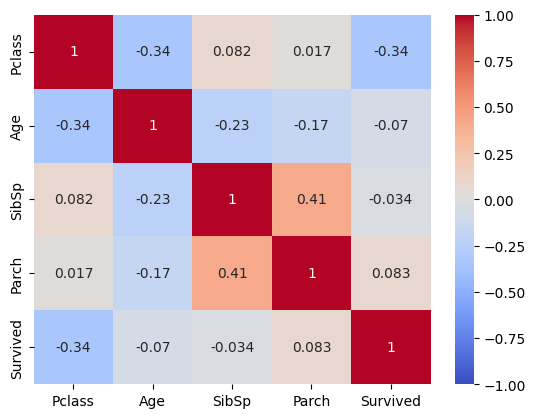

In [16]:
sns.heatmap(data.corr(numeric_only=True), cmap='coolwarm', vmin=-1, vmax=1, annot=True) # 상관계수 값 함께 출력

- 1 또는 -1에 가까울수록 큰 상관관계
- 정적 상관: 상관관계 계수가 양수일 때, A가 증가할수록 B도 함께 증가하는 경우
- 부적 상관: 상관관계 계수가 음수일 때, A가 증가할수록 B도 감소하는 경우

-> 단순히 숫자가 크고 작음으로 상관관계의 크기를 판단하면 안 된다.

**<상관계수 및 히트맵 해석>**
- `SibSp와` `Parch`: 약 0.41로, 혼자 온 승객이 상당히 많고, 가족을 동반할 경우 부모와 자녀, 형제와 배우자를 함께 동반하는 경우가 많기 때문으로 예상
- `Age`와 `Pclass`, `Survived`와 `Pclass`: 약 -0.34으로 클래스가 높을수록 나이가 어리고, 클래스가 높을수록 사망한 경우가 많음
- 히트맵 시각화를 통해 한눈에 보기 쉽게 확인 가능


## 5.4 전처리: 범주형 변수 변환하기(더미 변수와 원-핫 인코딩)
- 머신러닝 알고리즘은 문자열로 된 데이터를 이해하지 못함 -> object형을 숫자화
- 단순하게 각 값을 1, 2, 3, ...으로 대체하면 선형 모델에서는 숫자가 상대적인 서열로 인식됨
- 더미 변수 / 원-핫 인코딩
    - 범주(또는 문자) 형태의 변수를 숫자로 표현하는 방법
    - 변수에 속해 있는 고유값에 대한 새로운 변수들을 만들어 0과 1로 표현
> 타이타닉 데이터셋의 object 변수: `Name`, `Sex`, `Ticket`, `Embarked`

In [17]:
data['Name'].nunique()

889

In [18]:
data['Sex'].nunique()

2

In [19]:
data['Ticket'].nunique()

680

In [20]:
data['Embarked'].nunique()

3

- `Name`, `Sex`, `Ticket`, `Embarked`의 각 고유값 개수: 889, 2, 680, 3
- `Sex`: 성별 (female, male)
- `Embarked`: 승선한 항구 3개
- `Name`, `Ticket을` 더미 변수로 변환하면 고유값이 너무 많음 -> 이름이 생존 여부에 영향을 주지는 않을 것으로 추론 `name` 제거
- `Pclass` 컬럼을 가지고 있기 때문에 `ticket`도 삭제
- `Sex`, `Embarked`만 원핫인코딩

In [21]:
# 이름, 티켓 컬럼 삭제

data = data.drop(['Name','Ticket'], axis=1)

In [22]:
# 잘 삭제되었는지 확인

data.head()

,Pclass,Sex,Age,SibSp,Parch,Embarked,Survived
0,3,male,22.0,1,0,S,0
1,1,female,38.0,1,0,C,1
2,3,female,26.0,0,0,S,1
3,1,female,35.0,1,0,S,1
4,3,male,35.0,0,0,S,0


In [23]:
# One-hot encoding
## data에 저장하지는 않고, 변환된 모습만 출력

pd.get_dummies(data, columns=['Sex','Embarked'])

,Pclass,Age,SibSp,Parch,Survived,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,22.0,1,0,0,False,True,False,False,True
1,1,38.0,1,0,1,True,False,True,False,False
2,3,26.0,0,0,1,True,False,False,False,True
3,1,35.0,1,0,1,True,False,False,False,True
4,3,35.0,0,0,0,False,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...
884,2,27.0,0,0,0,False,True,False,False,True
885,1,19.0,0,0,1,True,False,False,False,True
886,3,28.0,1,2,0,True,False,False,False,True
887,1,26.0,0,0,1,False,True,True,False,False


- `Sex_male/female`, `Embarked_C/Q/S`: 둘 중 하나만, 셋 중 둘만 알아도 나머지 하나를 파악할 수 있음
-> 컬럼 개수를 줄이고, 데이터 계산량도 줄이자

In [24]:
data = pd.get_dummies(data, columns=['Sex','Embarked'], drop_first=True)

## 5.5 모델링 및 예측하기

In [25]:
# pip install scikit-learn

In [26]:
from sklearn.model_selection import train_test_split

X = data.drop('Survived', axis = 1) # 종속변수 제외
y = data['Survived'] # 종속변수만 포함
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 100) # train/test set split

In [27]:
# Logistic Reg.
from sklearn.linear_model import LogisticRegression

In [28]:
model = LogisticRegression() # create a model
model.fit(X_train, y_train) # train the model using the titanic dataset

LogisticRegression()

In [29]:
# 예측하기
pred = model.predict(X_test)

## 5.6 예측 모델 평가하기
- 이진 분류 문제에서의 성능 지표: 정확도(accuracy), 오차 행렬(Confusion matrix), 정밀도(Precision), 재현율(Recall), F1 Score, 민감도, 특이도, AUC, etc.
- RMSE는 회귀 모델 평가에서 적합한 지표
- 5장에서는 가장 간단한 `정확도`를 사용해 평가

In [30]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, pred)

0.7808988764044944

- 로지스틱 회귀 모형의 정확도: 약 78% -> 나쁜 건 아니지만 좋은 것도 아님, XGBoost/LightGBM을 사용하면 더 높은 성능을 보일 수 있을 것
- 정확도의 좋고 나쁨을 결정하는 절대적인 지표는 없음 -> 처한 상황에 따라 다르게 고려해야 함
- e.g., 예측하려는 종속변수의 고유값이 2개가 아닌 10개라면 상대적으로 더 낮은 정확도도 용인될 수 있다
    - 고유값이 2개이더라도 비율이 어떠한가에 따라 평가 기준이 달라질 수 있음
> 타이타닉 데이터는 더 높은 정확도를 기대할 수 있는 조건이라 78%의 정확도는 아쉽다

In [31]:
model.coef_

array([[-1.18186235, -0.03990397, -0.32076862,  0.00804641, -2.56834708,
        -0.07489185, -0.2373207 ]])

cf) 4장에서의 coef 결과: array() 안의 리스트 []\
이번에는 2중 리스트 형태 [[]]

In [32]:
pd.Series(model.coef_, index=X.columns)

ValueError: Length of values (1) does not match length of index (7)

Error: `ValueError: Length of values (1) does not match length of index (7)`\
model.coef_의 길이는 1, 인덱스 X.columns의 길이는 7 -> 안 맞음

In [33]:
len(model.coef_[0]) # 첫 번째 값의 길이
# model.coef_ 길이와 X.columns의 값을 똑같이 맞춤

7

In [34]:
pd.Series(model.coef_[0], index=X.columns) # model.coef_를 7개의 값이 되도록 풀어서 컬럼 이름 매핑

Pclass       -1.181862
Age          -0.039904
SibSp        -0.320769
Parch         0.008046
Sex_male     -2.568347
Embarked_Q   -0.074892
Embarked_S   -0.237321
dtype: float64

<해석>
- `Pclass`: 음의 계수 - `Pclass`가 높을수록 생존 가능성이 낮다
    - `Pclass`는 낮은 숫자일수록 좋은 등급 (좋은 등급일수록 생존 가능성이 높다)
- `Age`는 낮을수록, 성별은 여성일수록 높은 생존 가능성
- 계수를 단순히 기울기 값처럼 곱해서 수식을 만들면 안 된다

## 5.7 이해하기: 피처 엔지니어링
- Feature Engineering(특징 공학/특성 공학): 기존 데이터를 손보아 더 나은 변수를 만드는 기법
    - Feature: 독립변수의 다른 표현
- 도메인 지식을 바탕으로 정확한 목적을 가지고 수행하는 피처 엔지니어링이 더욱 효율적

### 다중공선성(Multicolinearity) 문제
- 독립변수 사이에 상관관계가 높을 때 발생하는 문제
- 해결 방법
    1) 상관관계가 높은 변수 중 하나를 제거
    2) 둘을 모두 포괄하는 새로운 변수 만들기
    3) 차원 축소

-> 5장에서는 `Parch`, `SibSp`가 그나마 조금 강한 상관관계를 보였으므로 이 둘을 새로운 변수로 만들 것

`Parch` (부모/자식) + `SibSp` (형제/자매, 배우자) => `가족 구성원`\
-> 두 변수를 합쳐서 가족구성원 숫자를 나타내는 변수로 만들어 보자

In [35]:
data['family'] = data['SibSp'] + data['Parch']
data.drop(['SibSp','Parch'], axis=1, inplace=True)
data.head()

,Pclass,Age,Survived,Sex_male,Embarked_Q,Embarked_S,family
0,3,22.0,0,True,False,True,1
1,1,38.0,1,False,False,False,1
2,3,26.0,1,False,False,True,0
3,1,35.0,1,False,False,True,1
4,3,35.0,0,True,False,True,0


In [36]:
# 다시 모델링, 평가 해 보기
X = data.drop('Survived', axis = 1)
y = data['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 100)
model = LogisticRegression()
model.fit(X_train, y_train)
pred = model.predict(X_test)
accuracy_score(y_test, pred)

0.7921348314606742

독립변수의 수가 하나 줄어들지만 정확도가 0.012 정도 높아졌다!

-> **모델링**은 한 번에 끝나는 게 아니라 다양한 시도를 재반복해서 더 나은 결과를 얻는 것.

> 피처 엔지니어링에는 정답이 없다.

## 과제
- 피처 엔지니어링에서 `family` 변수를 만드는 것 대신 `parch` 또는 `SibSp` 중 하나를 제거해서 예측해 보기
- 또는 다른 아이디어 : 탑승한 항구에 대한 정보가 굳이 필요할까? 생존 가능성에 큰 영향이 없을 것 같은데... 제거해서 예측해 보자

In [37]:
# Embarked 변수 제거
data2 = data.copy()
data2 = data2.drop(['Embarked_Q','Embarked_S'], inplace=True)
data2.head()

KeyError: "['Embarked_Q', 'Embarked_S'] not found in axis"

In [38]:
# 다시 모델링, 평가 해 보기
X = data2.drop('Survived', axis = 1)
y = data2['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 100)
model = LogisticRegression()
model.fit(X_train, y_train)
pred = model.predict(X_test)
accuracy_score(y_test, pred)

0.7921348314606742

처음보다는 높긴 하지만 첫 피처 엔지니어링 후보다 낮아짐 -> 굳이 지우지 말자

In [39]:
# Parch 또는 SibSp 둘 중 하나 삭제해 보기

df = pd.read_csv(file_url)
df = df.drop(['Name','Ticket'], axis=1)
df = pd.get_dummies(df, columns=['Sex','Embarked'], drop_first=True)
df.head()

,Pclass,Age,SibSp,Parch,Survived,Sex_male,Embarked_Q,Embarked_S
0,3,22.0,1,0,0,True,False,True
1,1,38.0,1,0,1,False,False,False
2,3,26.0,0,0,1,False,False,True
3,1,35.0,1,0,1,False,False,True
4,3,35.0,0,0,0,True,False,True


In [40]:
# Parch 삭제 후 모델링, 평가 해 보기
X = df.drop(['Parch','Survived'], axis = 1)
y = df['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 100)
model = LogisticRegression()
model.fit(X_train, y_train)
pred = model.predict(X_test)
accuracy_score(y_test, pred)

0.7808988764044944

In [41]:
X

,Pclass,Age,SibSp,Sex_male,Embarked_Q,Embarked_S
0,3,22.0,1,True,False,True
1,1,38.0,1,False,False,False
2,3,26.0,0,False,False,True
3,1,35.0,1,False,False,True
4,3,35.0,0,True,False,True
...,...,...,...,...,...,...
884,2,27.0,0,True,False,True
885,1,19.0,0,False,False,True
886,3,28.0,1,False,False,True
887,1,26.0,0,True,False,False


In [42]:
# SibSp 삭제 후 모델링, 평가 해 보기
X = df.drop(['SibSp','Survived'], axis = 1)
y = df['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 100)
model = LogisticRegression()
model.fit(X_train, y_train)
pred = model.predict(X_test)
accuracy_score(y_test, pred)

0.7921348314606742

In [43]:
X

,Pclass,Age,Parch,Sex_male,Embarked_Q,Embarked_S
0,3,22.0,0,True,False,True
1,1,38.0,0,False,False,False
2,3,26.0,0,False,False,True
3,1,35.0,0,False,False,True
4,3,35.0,0,True,False,True
...,...,...,...,...,...,...
884,2,27.0,0,True,False,True
885,1,19.0,0,False,False,True
886,3,28.0,2,False,False,True
887,1,26.0,0,True,False,False


## 연습 문제
1. 2번 : 상관계수의 절대값이 1에 가까울수록 상관관계가 높은 것, 0에 가까울수록 낮다고 해석해야 함
2. 2번 : 문자형 변수의 고유값 개수에 맞춰서 증가함
3. 3번 : 0과 1로 표현된 이진 분류의 문제에서는 로지스틱 회귀가 적합

# 🍷 06장 K-최근접 이웃(KNN)

K-최근접 이웃(K Nearest Neighbors, KNN)
- 거리 기반 모델 (각 데이터 간의 거리를 활용해서 새로운 데이터를 예측하는 모델)
- 종속 변수가 범주형, 개수가 3개 이상인 다중분류(Multiclassification)에서 가장 간편히 적용할 수 있는 알고리즘

## 6.1 문제 정의: 한눈에 보는 예측 목표
- 독립변수: 알코올, 말산, 마그네슘, 색조 등
- 종속변수: 와인 등급(3가지)

## 6.2 라이브러리 및 데이터 불러오기

In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

file_url = 'https://media.githubusercontent.com/media/musthave-ML10/data_source/main/wine.csv'
data = pd.read_csv(file_url)

## 6.3 데이터 확인하기

In [45]:
data.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,class
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,0
1,NaN,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,0
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,0
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,0
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,0


- 가장 우측의 종속변수인 class 외의 나머지 12개는 독립변수
    - 와인의 성분과 성질에 대한 정보들

In [46]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       176 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    int64  
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          173 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    int64  
 13  class

- 178개의 로우, 14개의 컬럼
- 모두 숫자형 변수들로 구성되어 있음
- 결측치
    - `alcohol`: 2개의 결측치
    - `nonflavanoid_phenols`: 5개의 결측치

In [47]:
data.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,class
count,176.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,173.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,12.989091,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.362370,1.590899,5.058090,0.957449,2.611685,746.893258,0.938202
std,0.804431,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.126153,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,0.000000
25%,12.355000,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.260000,1.250000,3.220000,0.782500,1.937500,500.500000,0.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,1.000000
75%,13.672500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.450000,1.950000,6.200000,1.120000,3.170000,985.000000,2.000000
max,14.750000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,2.000000


1. 변수마다 스케일이 다르다 : 최소값이 0.13, 최대값이 0.66인 `nonflavanoid_phenols`와 최소값이 278, 최대값이 1680인 `proline` -> 스케일링 필요
2. Outlier: 75%와 max 값의 차이가 유독 두드러진 것을 볼 수 있다
    - `color_intensity`: min부터 75%까지는 고른 패턴으로 증가하다가 75%와 max가 6.2에서 13으로 갑자기 2배 이상 증가
    - 모델링에 영향을 미칠 수 있으므로 확인해 두어야 함

## 6.4 목푯값에서 고윳값 확인하기

In [48]:
data['class'].unique()

array([0, 1, 2])

In [49]:
data['class'].nunique()

3

In [50]:
data['class'].value_counts()

class
1    71
0    59
2    48
Name: count, dtype: int64

`unique()`, `nunique()`, `value_counts()` _각각 컬럼의 고윳값, 고윳값 가짓수, 각 고윳값에 해당하는 개수_ 를 출력

목적에 따라 필요한 함수만 사용


<Axes: xlabel='class', ylabel='count'>

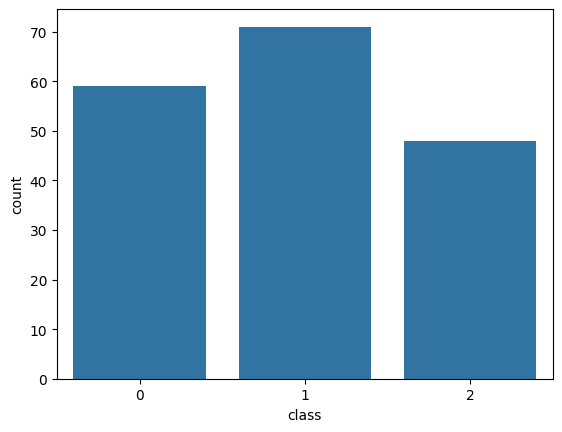

In [51]:
sns.barplot(x = data['class'].value_counts().index, y = data['class'].value_counts())

In [52]:
data['class'].value_counts().index

Index([1, 0, 2], dtype='int64', name='class')

<Axes: ylabel='count'>

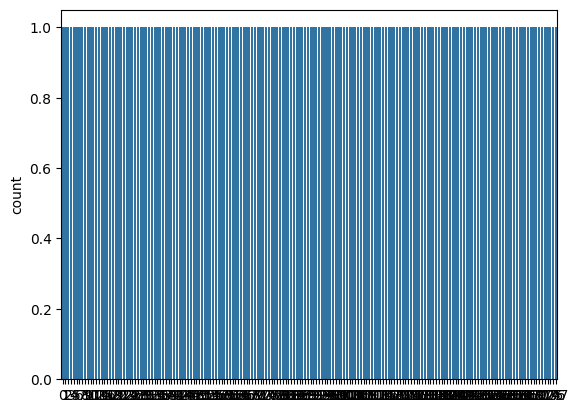

In [53]:
sns.countplot(data['class'])

그래프가 왜 이렇게 출력되는 것인가...... 5장에서 발생한 문제처럼 버전에 따른 차이인가?
> `<Axes: ylabel='count'>`를 봐선 xlabel을 잘못 찾은 듯하다

<Axes: xlabel='class', ylabel='count'>

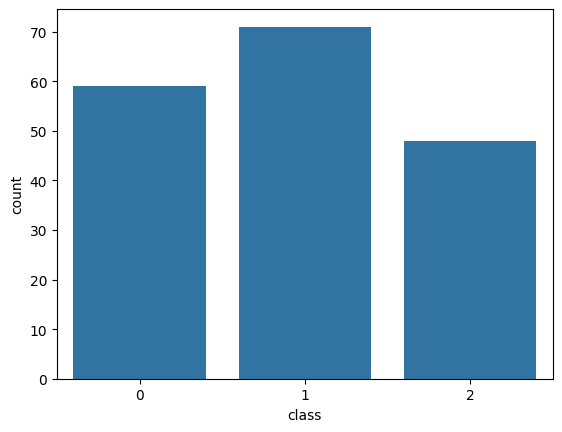

In [54]:
sns.countplot(x='class', data=data)

수정했더니 괜찮아졌습니다

## 6.5 전처리: 결측치 확인하기

### 6.5.1 결측치를 쉽게 확인하는 방법

In [55]:
data.isna() # 값을 결측치 여부에 따라 T/F로 변환

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,class
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,True,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,False,False,False,False,False,False,False,False,False,False,False,False,False,False
174,False,False,False,False,False,False,False,False,False,False,False,False,False,False
175,False,False,False,False,False,False,False,False,False,False,False,False,False,False
176,False,False,False,False,False,False,False,False,False,False,False,False,False,False


직접적이긴 하지만 하나하나 확인하는 건 로우의 개수가 많아지면 비효율적이다

In [56]:
data.sum() # 변수별 합 출력

alcohol                           2286.080000
malic_acid                         415.870000
ash                                421.240000
alcalinity_of_ash                 3470.100000
magnesium                        17754.000000
total_phenols                      408.530000
flavanoids                         361.210000
nonflavanoid_phenols                62.690000
proanthocyanins                    283.180000
color_intensity                    900.339999
hue                                170.426000
od280/od315_of_diluted_wines       464.880000
proline                         132947.000000
class                              167.000000
dtype: float64

In [57]:
data.isna().sum() # 값을 T/F로 변환 -> 합 계산

alcohol                         2
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            5
proanthocyanins                 0
color_intensity                 0
hue                             0
od280/od315_of_diluted_wines    0
proline                         0
class                           0
dtype: int64

- True/False: Bool type
    - True: 1
    - False: 0

In [58]:
data.mean()

alcohol                          12.989091
malic_acid                        2.336348
ash                               2.366517
alcalinity_of_ash                19.494944
magnesium                        99.741573
total_phenols                     2.295112
flavanoids                        2.029270
nonflavanoid_phenols              0.362370
proanthocyanins                   1.590899
color_intensity                   5.058090
hue                               0.957449
od280/od315_of_diluted_wines      2.611685
proline                         746.893258
class                             0.938202
dtype: float64

In [59]:
data.isna().mean() # 값을 T/F로 변환 -> 평균 계산

alcohol                         0.011236
malic_acid                      0.000000
ash                             0.000000
alcalinity_of_ash               0.000000
magnesium                       0.000000
total_phenols                   0.000000
flavanoids                      0.000000
nonflavanoid_phenols            0.028090
proanthocyanins                 0.000000
color_intensity                 0.000000
hue                             0.000000
od280/od315_of_diluted_wines    0.000000
proline                         0.000000
class                           0.000000
dtype: float64

`alcohol`의 약 1.12%, `nonflavanoid_phenols`의 약 2.81%가 결측치

### 6.5.2 결측치를 처리하는 방법

In [60]:
# 방식 1 - 결측치 행 제거하기: dropna()
data.dropna()
data.dropna().isna().mean()

# data = data.dropna()
# data.dropna(inplace=True)

alcohol                         0.0
malic_acid                      0.0
ash                             0.0
alcalinity_of_ash               0.0
magnesium                       0.0
total_phenols                   0.0
flavanoids                      0.0
nonflavanoid_phenols            0.0
proanthocyanins                 0.0
color_intensity                 0.0
hue                             0.0
od280/od315_of_diluted_wines    0.0
proline                         0.0
class                           0.0
dtype: float64

In [61]:
data.dropna(subset=['alcohol']) # 지정된 변수의 결측치 행만 제거하기

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,class
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,0
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,0
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,0
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,0
5,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740,2
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750,2
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835,2
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840,2


`alcohol` 변수에만 적용했기 때문에 2개의 행만 제거됨 -> 176개의 로우

In [62]:
data.dropna(subset=['alcohol']).isna().mean()

alcohol                         0.000000
malic_acid                      0.000000
ash                             0.000000
alcalinity_of_ash               0.000000
magnesium                       0.000000
total_phenols                   0.000000
flavanoids                      0.000000
nonflavanoid_phenols            0.028409
proanthocyanins                 0.000000
color_intensity                 0.000000
hue                             0.000000
od280/od315_of_diluted_wines    0.000000
proline                         0.000000
class                           0.000000
dtype: float64

`alcohol`의 결측치 0개, `nonflavanoid_phenols`의 결측치는 아직 남아 있음

In [63]:
# 방식 2 - 결측 변수 제거하기: drop()

# data.drop(['alcohol','nonflavanoid_phenols'], axis=1)

In [64]:
# 방식 3 - 결측값 채우기: fillna()

# data.fillna(-99) # 결측치를 -99로 변경
# data.fillna(data.mean()) # 결측치를 평균으로 대체

### 6.5.3 결측치 처리 방식 선택하기
- dropna()를 활용한 _결측치 행 제거_ : 일반적이나 경우에 따라서는 과도하게 많은 데이터가 삭제될 수 있다
- drop()을 활용한 _변수 제거_ : ML에서는 변수 하나하나가 중요하다, 어느 정도 비중으로 결측치가 있을 때 drop()을 적용하는 것이 좋은가에 대한 기준은 주관적
- 평균값 등으로 _결측치 대체_ : 무난한 방법이나 추정치이기 때문에 노이즈가 더해진 효과를 내게 됨

> 해당 교재에서는 평균으로 처리하는 수준까지만 다룬다

### 6.5.4 결측치 처리하기
- fillna()를 사용하여 결측치를 채우되 아웃라이어에 조금 덜 민감한 **중윗값**을 사용

In [65]:
data.fillna(data.median(), inplace=True)
data.isna().mean()

alcohol                         0.0
malic_acid                      0.0
ash                             0.0
alcalinity_of_ash               0.0
magnesium                       0.0
total_phenols                   0.0
flavanoids                      0.0
nonflavanoid_phenols            0.0
proanthocyanins                 0.0
color_intensity                 0.0
hue                             0.0
od280/od315_of_diluted_wines    0.0
proline                         0.0
class                           0.0
dtype: float64

## 6.6 스케일링
> 인위적으로 각 컬럼이 비슷한 범위를 가지도록 만드는 작업

KNN은 거리 기반 알고리즘 - 스케일에 민감

In [66]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

### 6.6.1 표준화 스케일링

In [67]:
st_scaler = StandardScaler() # 스케일러 지정

In [68]:
st_scaler.fit(data)
st_scaled = st_scaler.transform(data) # 학습에서 얻은 정보 계산
st_scaled

array([[ 1.55484903, -0.5622498 ,  0.23205254, ...,  1.84791957,
         1.01300893, -1.21394365],
       [ 0.07550273, -0.49941338, -0.82799632, ...,  1.1134493 ,
         0.96524152, -1.21394365],
       [ 0.21340789,  0.02123125,  1.10933436, ...,  0.78858745,
         1.39514818, -1.21394365],
       ...,
       [ 0.35131305,  1.74474449, -0.38935541, ..., -1.48544548,
         0.28057537,  1.37386437],
       [ 0.22594472,  0.22769377,  0.01273209, ..., -1.40069891,
         0.29649784,  1.37386437],
       [ 1.4294807 ,  1.58316512,  1.36520822, ..., -1.42894777,
        -0.59516041,  1.37386437]])

Numpy Array 형태 : 인덱스와 컬럼명 없이 한 줄로 쭉 이어서 표현

In [69]:
pd.DataFrame(st_scaled)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1.554849,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.658865,1.224884,0.251717,0.362177,1.847920,1.013009,-1.213944
1,0.075503,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820072,-0.544721,-0.293321,0.406051,1.113449,0.965242,-1.213944
2,0.213408,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.497658,2.135968,0.269020,0.318304,0.788587,1.395148,-1.213944
3,1.730365,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981279,1.032155,1.186068,-0.427544,1.184071,2.334574,-1.213944
4,0.313703,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.227773,0.401404,-0.319276,0.362177,0.449601,-0.037874,-1.213944
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,0.902934,2.974543,0.305159,0.301803,-0.332922,-0.985614,-1.424900,1.275618,-0.930179,1.142811,-1.392758,-1.231206,-0.021952,1.373864
174,0.514292,1.412609,0.414820,1.052516,0.158572,-0.793334,-1.284344,0.550187,-0.316950,0.969783,-1.129518,-1.485445,0.009893,1.373864
175,0.351313,1.744744,-0.389355,0.151661,1.422412,-1.129824,-1.344582,0.550187,-0.422075,2.224236,-1.612125,-1.485445,0.280575,1.373864
176,0.225945,0.227694,0.012732,0.151661,1.422412,-1.033684,-1.354622,1.356221,-0.229346,1.834923,-1.568252,-1.400699,0.296498,1.373864


In [70]:
# 컬럼명을 지정하여 데이터 프레임으로 변환
st_scaled = pd.DataFrame(st_scaled, columns = data.columns)
st_scaled

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,class
0,1.554849,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.658865,1.224884,0.251717,0.362177,1.847920,1.013009,-1.213944
1,0.075503,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820072,-0.544721,-0.293321,0.406051,1.113449,0.965242,-1.213944
2,0.213408,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.497658,2.135968,0.269020,0.318304,0.788587,1.395148,-1.213944
3,1.730365,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981279,1.032155,1.186068,-0.427544,1.184071,2.334574,-1.213944
4,0.313703,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.227773,0.401404,-0.319276,0.362177,0.449601,-0.037874,-1.213944
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,0.902934,2.974543,0.305159,0.301803,-0.332922,-0.985614,-1.424900,1.275618,-0.930179,1.142811,-1.392758,-1.231206,-0.021952,1.373864
174,0.514292,1.412609,0.414820,1.052516,0.158572,-0.793334,-1.284344,0.550187,-0.316950,0.969783,-1.129518,-1.485445,0.009893,1.373864
175,0.351313,1.744744,-0.389355,0.151661,1.422412,-1.129824,-1.344582,0.550187,-0.422075,2.224236,-1.612125,-1.485445,0.280575,1.373864
176,0.225945,0.227694,0.012732,0.151661,1.422412,-1.033684,-1.354622,1.356221,-0.229346,1.834923,-1.568252,-1.400699,0.296498,1.373864


In [71]:
round(st_scaled.describe(), 2) # 소수점 둘째자리까지만 출력되도록 반올림

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,class
count,178.00,178.00,178.00,178.00,178.00,178.00,178.00,178.00,178.00,178.00,178.00,178.00,178.00,178.00
mean,-0.00,-0.00,-0.00,-0.00,-0.00,0.00,-0.00,0.00,-0.00,0.00,0.00,0.00,-0.00,0.00
std,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
min,-2.46,-1.43,-3.68,-2.67,-2.09,-2.11,-1.70,-1.87,-2.07,-1.63,-2.09,-1.90,-1.49,-1.21
25%,-0.79,-0.66,-0.57,-0.69,-0.82,-0.89,-0.83,-0.74,-0.60,-0.80,-0.77,-0.95,-0.78,-1.21
50%,0.08,-0.42,-0.02,0.00,-0.12,0.10,0.11,-0.18,-0.06,-0.16,0.03,0.24,-0.23,0.08
75%,0.84,0.67,0.70,0.60,0.51,0.81,0.85,0.61,0.63,0.49,0.71,0.79,0.76,1.37
max,2.21,3.11,3.16,3.15,4.37,2.54,3.06,2.40,3.49,3.44,3.30,1.96,2.97,1.37


**평균 0, 표준편차 1**로 바뀐 것을 알 수 있음
> 스케일링 이전 데이터셋의 각 컬럼별 통계량의 범위보다는 스케일이 줄어든 것을 확인할 수 있다

### 6.6.2 로버스트 스케일링

In [72]:
rb_scaler = RobustScaler()

In [73]:
rb_scaled = rb_scaler.fit_transform(data) # 로버스트 스케일링
rb_scaled = pd.DataFrame(rb_scaled, columns=data.columns) # df로 변환
round(rb_scaled.describe(),2)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,class
count,178.00,178.00,178.00,178.00,178.00,178.00,178.00,178.00,178.00,178.00,178.00,178.00,178.00,178.00
mean,-0.05,0.32,0.02,-0.00,0.09,-0.06,-0.06,0.13,0.05,0.12,-0.02,-0.14,0.15,-0.03
std,0.62,0.75,0.79,0.78,0.75,0.59,0.60,0.74,0.82,0.78,0.68,0.58,0.65,0.39
min,-1.55,-0.76,-2.88,-2.07,-1.47,-1.30,-1.07,-1.25,-1.64,-1.14,-1.44,-1.23,-0.82,-0.50
25%,-0.53,-0.18,-0.43,-0.53,-0.53,-0.58,-0.56,-0.42,-0.44,-0.49,-0.54,-0.68,-0.36,-0.50
50%,0.00,-0.00,0.00,0.00,0.00,0.00,0.00,0.00,-0.00,0.00,0.00,0.00,0.00,0.00
75%,0.47,0.82,0.57,0.47,0.47,0.42,0.44,0.58,0.56,0.51,0.46,0.32,0.64,0.50
max,1.31,2.66,2.50,2.44,3.37,1.44,1.76,1.91,2.89,2.79,2.21,0.99,2.08,0.50


### 6.6.3 최소-최대 스케일링

In [74]:
mm_scaler = MinMaxScaler()
mm_scaled = mm_scaler.fit_transform(data)
mm_scaled = pd.DataFrame(mm_scaled, columns = data.columns)
round(mm_scaled.describe(), 2)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,class
count,178.00,178.00,178.00,178.00,178.00,178.00,178.00,178.00,178.00,178.00,178.00,178.00,178.00,178.00
mean,0.53,0.32,0.54,0.46,0.32,0.45,0.36,0.44,0.37,0.32,0.39,0.49,0.33,0.47
std,0.22,0.22,0.15,0.17,0.16,0.22,0.21,0.23,0.18,0.20,0.19,0.26,0.22,0.39
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.36,0.17,0.45,0.34,0.20,0.26,0.18,0.26,0.26,0.17,0.25,0.24,0.16,0.00
50%,0.54,0.22,0.53,0.46,0.30,0.47,0.38,0.40,0.36,0.29,0.39,0.55,0.28,0.50
75%,0.71,0.46,0.64,0.56,0.40,0.63,0.53,0.58,0.49,0.42,0.52,0.70,0.50,1.00
max,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00


> 최댓값 1, 최솟값 0인 형태로 변환

### 6.6.4 스케일링 방식 선택하기
> 아웃라이어의 유무에 따라 판단

- `로버스트 스케일링`: 아웃라이어의 영향이 큰 데이터, 이를 피하고 싶은 경우
- `최소-최대 스케일링`: 데이터의 기존 분포를 최대한 유지하고 싶은 경우
- `표준화 스케일링`: 기존 데이터가 정규분포를 따르고 있고 아웃라이어가 없는 경우 무난하게 사용

‼️ 주의할 점
1. 스케일링 대상에서 종속변수 제외
2. 스케일링 전에 훈련셋과 시험셋을 나누어야 함

### 6.6.5 스케일링 적용하기

In [75]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data.drop('class', axis=1),data['class'], test_size=0.2, random_state=100)

In [76]:
# min-max scaling
mm_scaler = MinMaxScaler()
mm_scaler.fit(X_train)

MinMaxScaler()

In [77]:
X_train_scaled = mm_scaler.transform(X_train)
X_test_scaled = mm_scaler.transform(X_test)

In [78]:
# 더 간단하게

mm_scaler = MinMaxScaler()
X_train_scaled = mm_scaler.fit_transform(X_train)
X_test_scaled = mm_scaler.transform(X_test)

`train_test_split()`을 사용해서 독립변수 X와 종속변수 y로 분류했으므로 `X_train`, `X_test`에는 목푯값이 제외되어 있음
> df로 변형하지 않고 np 형태 그대로 모델링에 적용

## 6.7 모델링 및 예측/평가하기

In [79]:
from sklearn.neighbors import KNeighborsClassifier

In [80]:
knn = KNeighborsClassifier()
knn.fit(X_train_scaled,y_train)
pred = knn.predict(X_test_scaled)

In [81]:
pred

array([1, 2, 0, 1, 2, 2, 1, 2, 1, 0, 2, 0, 2, 2, 2, 0, 2, 0, 1, 0, 2, 0,
       2, 1, 0, 0, 1, 1, 1, 2, 2, 1, 0, 1, 2, 2])

In [82]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, pred) # 5장과 같이 정확도 사용

0.8888888888888888

약 89%의 정확도 -> 꽤 괜찮다

## 6.8 하이퍼파라미터 튜닝하기
> `n_neighbors`: KNN 알고리즘에서 예측에 가까운 이웃을 몇 개나 고려할지 정하는 매개변수

In [83]:
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train_scaled,y_train)
pred = knn.predict(X_test_scaled)
accuracy_score(y_test, pred)

0.9166666666666666

`n_neighbors`의 기본값: 5

-> **7**로 설정하여 다시 모델링, 평가한 결과 약 92%로 정확도 향상됨

In [84]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train_scaled,y_train)
pred = knn.predict(X_test_scaled)
accuracy_score(y_test, pred)

0.8888888888888888

In [85]:
for i in range(1, 21):
    knn = KNeighborsClassifier(n_neighbors=i) 
    knn.fit(X_train_scaled,y_train)     
    pred = knn.predict(X_test_scaled)   
    print(accuracy_score(y_test, pred))

0.9166666666666666
0.8888888888888888
0.8888888888888888
0.9166666666666666
0.8888888888888888
0.9166666666666666
0.9166666666666666
0.8888888888888888
0.8888888888888888
0.8888888888888888
0.9166666666666666
0.9166666666666666
0.9722222222222222
0.9444444444444444
0.9444444444444444
0.9444444444444444
0.9166666666666666
0.9722222222222222
0.9444444444444444
0.9722222222222222


매번 매개변수 값을 수정하는 것은 번거로움 -> 반복문을 사용해 보자

In [86]:
# 정확도를 scores 리스트에 저장
scores = []
for i in range(1, 21):
    knn = KNeighborsClassifier(n_neighbors=i) 
    knn.fit(X_train_scaled,y_train)     
    pred = knn.predict(X_test_scaled)   
    acc = accuracy_score(y_test, pred)
    scores.append(acc)

In [87]:
scores

[0.9166666666666666,
 0.8888888888888888,
 0.8888888888888888,
 0.9166666666666666,
 0.8888888888888888,
 0.9166666666666666,
 0.9166666666666666,
 0.8888888888888888,
 0.8888888888888888,
 0.8888888888888888,
 0.9166666666666666,
 0.9166666666666666,
 0.9722222222222222,
 0.9444444444444444,
 0.9444444444444444,
 0.9444444444444444,
 0.9166666666666666,
 0.9722222222222222,
 0.9444444444444444,
 0.9722222222222222]

<Axes: >

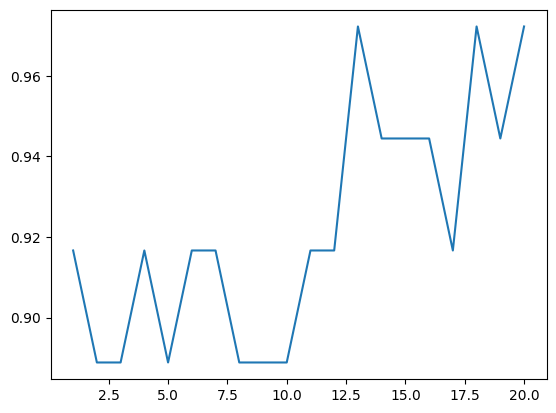

In [88]:
sns.lineplot(x=range(1,21), y=scores)

13 이후로는 정확도의 큰 개선이 보이지 않음
> 따라서 `n_neighbors`를 13으로 지정하자

In [89]:
knn = KNeighborsClassifier(n_neighbors=13)
knn.fit(X_train_scaled,y_train)
pred = knn.predict(X_test_scaled)
accuracy_score(y_test, pred)

0.9722222222222222

## 과제

In [90]:
import pandas as pd
titanic_url = 'https://media.githubusercontent.com/media/musthave-ML10/data_source/main/titanic.csv'
titanic = pd.read_csv(titanic_url)

In [91]:
titanic = titanic.drop(['Name','Ticket'], axis=1)
titanic = pd.get_dummies(titanic, columns=['Sex','Embarked'], drop_first=True)
titanic.head()

,Pclass,Age,SibSp,Parch,Survived,Sex_male,Embarked_Q,Embarked_S
0,3,22.0,1,0,0,True,False,True
1,1,38.0,1,0,1,False,False,False
2,3,26.0,0,0,1,False,False,True
3,1,35.0,1,0,1,False,False,True
4,3,35.0,0,0,0,True,False,True


In [92]:
titanic.describe()

,Pclass,Age,SibSp,Parch,Survived
count,889.000000,889.000000,889.000000,889.000000,889.000000
mean,2.311586,29.315152,0.524184,0.382452,0.382452
std,0.834700,12.984932,1.103705,0.806761,0.486260
min,1.000000,0.420000,0.000000,0.000000,0.000000
25%,2.000000,22.000000,0.000000,0.000000,0.000000
50%,3.000000,28.000000,0.000000,0.000000,0.000000
75%,3.000000,35.000000,1.000000,0.000000,1.000000
max,3.000000,80.000000,8.000000,6.000000,1.000000


In [93]:
# modeling
X_train, X_test, y_train, y_test = train_test_split(titanic.drop('Survived', axis=1),titanic['Survived'], test_size=0.2, random_state=100)

# standard scaling
st_scaler = StandardScaler()
X_train_scaled = st_scaler.fit_transform(X_train)
X_test_scaled = st_scaler.transform(X_test)

knn = KNeighborsClassifier()
knn.fit(X_train_scaled,y_train)
pred = knn.predict(X_test_scaled)

pred

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 1])

In [94]:
accuracy_score(y_test, pred)

0.8314606741573034

<Axes: >

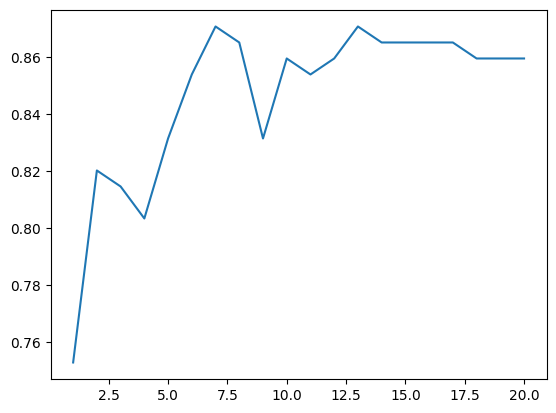

In [95]:
scores = []
for i in range(1, 21):
    knn = KNeighborsClassifier(n_neighbors=i) 
    knn.fit(X_train_scaled,y_train)     
    pred = knn.predict(X_test_scaled)   
    acc = accuracy_score(y_test, pred)
    scores.append(acc)

sns.lineplot(x=range(1,21), y=scores)

In [96]:
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train_scaled,y_train)
pred = knn.predict(X_test_scaled)
accuracy_score(y_test, pred)

0.8707865168539326

> 타이타닉 데이터에 대해 표준화 스케일링을 진행

> 이웃의 개수를 각각 5, 7로 설정했을 때 정확도가 약 0.83에서 0.87로 상승했다.

**_클래스_ 로 다음과 같이 구조화하면 더 편할 것 같습니다**

In [97]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

class TitanicClassifier:
    def __init__(self, url='https://media.githubusercontent.com/media/musthave-ML10/data_source/main/titanic.csv'):
        self.url = url
        self._load_and_preprocess_data()
        self.X_train, self.X_test, self.y_train, self.y_test = self._split_data()
        self.knn = KNeighborsClassifier()

    def _load_and_preprocess_data(self):
        titanic = pd.read_csv(self.url)
        titanic = titanic.drop(['Name', 'Ticket'], axis=1)
        titanic = pd.get_dummies(titanic, columns=['Sex', 'Embarked'], drop_first=True)
        self.X = titanic.drop('Survived', axis=1)
        self.y = titanic['Survived']

    def _split_data(self, test_size=0.2, random_state=100):
        # train/test set
        return train_test_split(self.X, self.y, test_size=test_size, random_state=random_state)
    
    def _scale_data(self, scaler_type='standard'):
        if scaler_type == 'standard':
            scaler = StandardScaler()
        elif scaler_type == 'minmax':
            scaler = MinMaxScaler()
        elif scaler_type == 'robust':
            scaler = RobustScaler()
        else:
            scaler = StandardScaler()
        self.X_train_scaled = scaler.fit_transform(self.X_train)
        self.X_test_scaled = scaler.transform(self.X_test)

    def fit_predict(self, n_neighbors=5, scaler_type='standard'):
        self._scale_data(scaler_type)
        self.knn = KNeighborsClassifier(n_neighbors=n_neighbors)
        self.knn.fit(self.X_train_scaled, self.y_train)
        pred = self.knn.predict(self.X_test_scaled)
        accuracy = accuracy_score(self.y_test, pred)
        print(f"n_neighbors={n_neighbors}일 때의 정확도: {accuracy:.4f}")
        return accuracy
    
    def find_best_k(self, start_k=1, end_k=20, scaler_type='standard'):
        self._scale_data(scaler_type)
        scores = []
        for i in range(start_k, end_k + 1):
            self.knn = KNeighborsClassifier(n_neighbors=i)
            self.knn.fit(self.X_train_scaled, self.y_train)
            pred = self.knn.predict(self.X_test_scaled)
            acc = accuracy_score(self.y_test, pred)
            scores.append(acc)
        
        # 결과 시각화
        plt.figure(figsize=(10, 6))
        sns.lineplot(x=range(start_k, end_k + 1), y=scores)
        plt.title(f'Accuracy vs. K value (Scaler: {scaler_type})')
        plt.xlabel('K value (n_neighbors)')
        plt.ylabel('Accuracy Score')
        plt.xticks(range(start_k, end_k + 1))
        plt.grid(True)
        plt.show()
        
        best_k = scores.index(max(scores)) + start_k
        print(f"최고 정확도: {max(scores):.4f}")
        print(f"최적의 K 값: {best_k}")
        return best_k, max(scores)

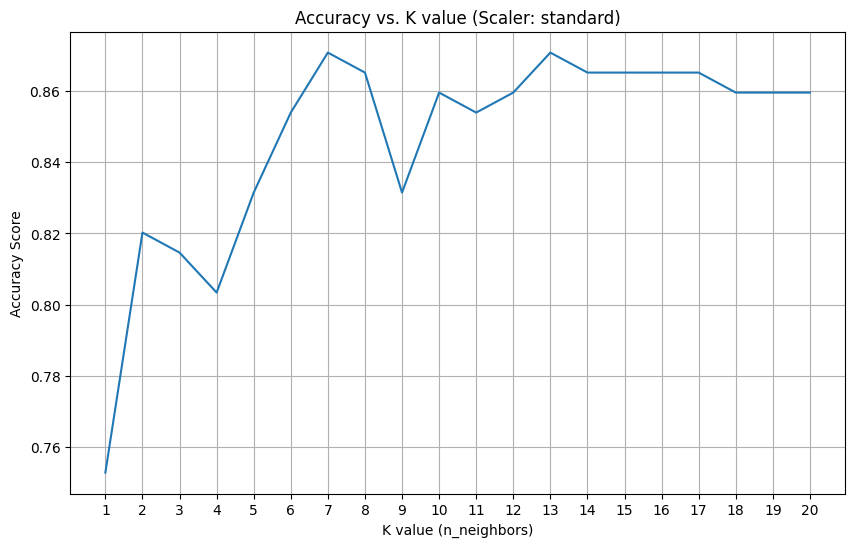

최고 정확도: 0.8708
최적의 K 값: 7
표준화 스케일링 최적의 K 값: 7, 최고 정확도: 0.8708


In [98]:
tc = TitanicClassifier()

best_k_standard, best_score_standard = tc.find_best_k(scaler_type='standard')
print(f"표준화 스케일링 최적의 K 값: {best_k_standard}, 최고 정확도: {best_score_standard:.4f}")

In [99]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

class WineClassifier:
    def __init__(self, url='https://media.githubusercontent.com/media/musthave-ML10/data_source/main/wine.csv'):
        self.url = url
        self._load_and_preprocess_data()
        self.X_train, self.X_test, self.y_train, self.y_test = self._split_data()
        self.knn = KNeighborsClassifier()

    def _load_and_preprocess_data(self):
        wine = pd.read_csv(self.url)
        self.y = wine['class']
        self.X = wine.drop('class', axis=1)
        self.X.fillna(self.X.median(), inplace=True)
        
    def _split_data(self, test_size=0.2, random_state=100):
        # train/test set
        return train_test_split(self.X, self.y, test_size=test_size, random_state=random_state)
    
    def _scale_data(self, scaler_type='standard'):
        if scaler_type == 'standard':
            scaler = StandardScaler()
        elif scaler_type == 'minmax':
            scaler = MinMaxScaler()
        elif scaler_type == 'robust':
            scaler = RobustScaler()
        else:
            scaler = StandardScaler()
        self.X_train_scaled = scaler.fit_transform(self.X_train)
        self.X_test_scaled = scaler.transform(self.X_test)

    def fit_predict(self, n_neighbors=5, scaler_type='standard'):
        self._scale_data(scaler_type)
        self.knn = KNeighborsClassifier(n_neighbors=n_neighbors)
        self.knn.fit(self.X_train_scaled, self.y_train)
        pred = self.knn.predict(self.X_test_scaled)
        accuracy = accuracy_score(self.y_test, pred)
        print(f"n_neighbors={n_neighbors}일 때의 정확도: {accuracy:.4f}")
        return accuracy
    
    def find_best_k(self, start_k=1, end_k=20, scaler_type='standard'):
        self._scale_data(scaler_type)
        scores = []
        for i in range(start_k, end_k + 1):
            self.knn = KNeighborsClassifier(n_neighbors=i)
            self.knn.fit(self.X_train_scaled, self.y_train)
            pred = self.knn.predict(self.X_test_scaled)
            acc = accuracy_score(self.y_test, pred)
            scores.append(acc)
        
        # 결과 시각화
        plt.figure(figsize=(10, 6))
        sns.lineplot(x=range(start_k, end_k + 1), y=scores)
        plt.title(f'Accuracy vs. K value (Scaler: {scaler_type})')
        plt.xlabel('K value (n_neighbors)')
        plt.ylabel('Accuracy Score')
        plt.xticks(range(start_k, end_k + 1))
        plt.grid(True)
        plt.show()
        
        best_k = scores.index(max(scores)) + start_k
        print(f"최고 정확도: {max(scores):.4f}")
        print(f"최적의 K 값: {best_k}")
        return best_k, max(scores)

> 이번에는 wine 데이터셋에 대해!

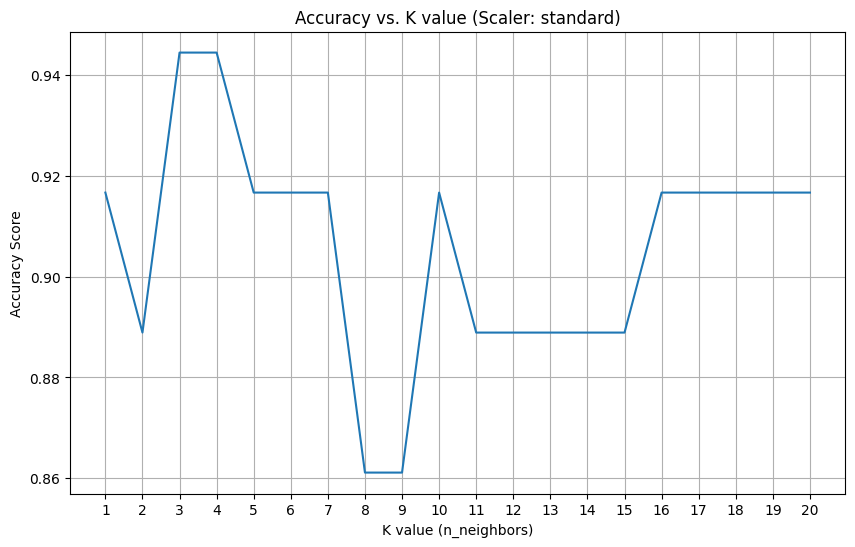

최고 정확도: 0.9444
최적의 K 값: 3
표준화 스케일링 최적의 K 값: 3, 최고 정확도: 0.9444


In [100]:
wc = WineClassifier()

best_k_standard, best_score_standard = wc.find_best_k(scaler_type='standard')
print(f"표준화 스케일링 최적의 K 값: {best_k_standard}, 최고 정확도: {best_score_standard:.4f}")

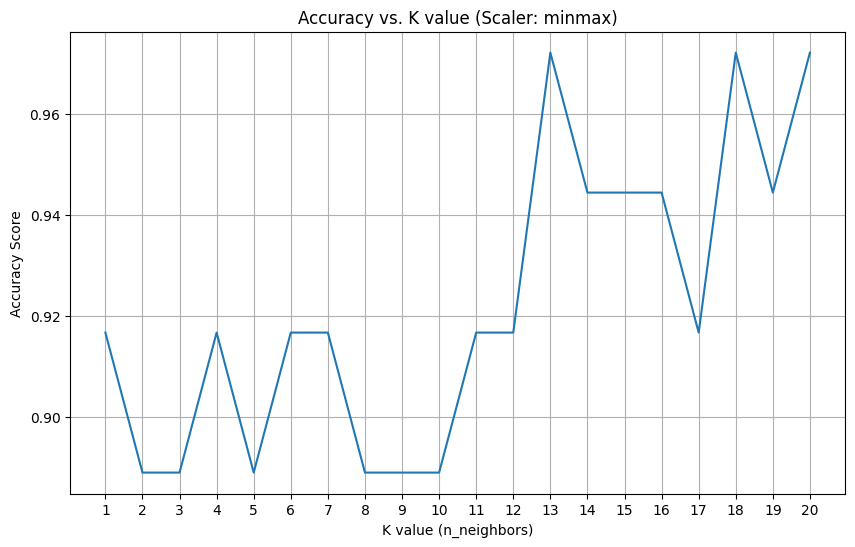

최고 정확도: 0.9722
최적의 K 값: 13
최소최대 스케일링 최적의 K 값: 13, 최고 정확도: 0.9722


In [101]:
best_k_standard, best_score_standard = wc.find_best_k(scaler_type='minmax')
print(f"최소최대 스케일링 최적의 K 값: {best_k_standard}, 최고 정확도: {best_score_standard:.4f}")

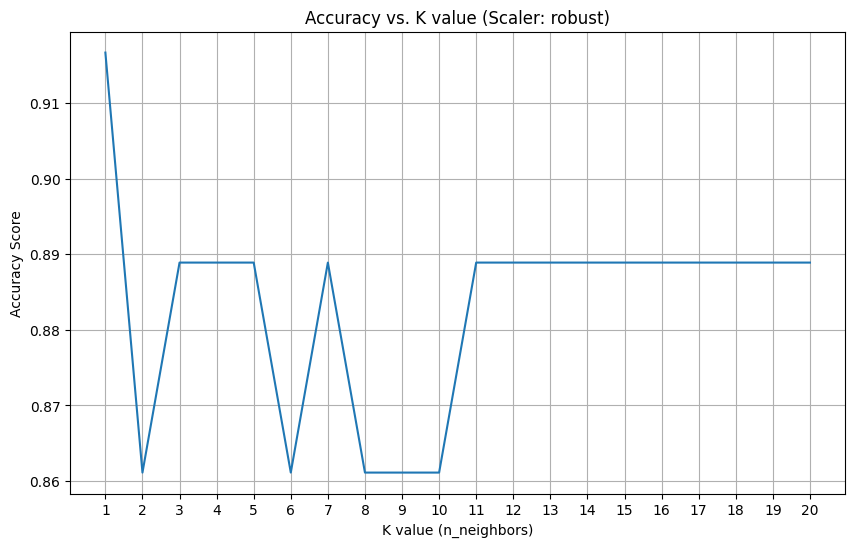

최고 정확도: 0.9167
최적의 K 값: 1
로버스트 스케일링 최적의 K 값: 1, 최고 정확도: 0.9167


In [102]:
best_k_standard, best_score_standard = wc.find_best_k(scaler_type='robust')
print(f"로버스트 스케일링 최적의 K 값: {best_k_standard}, 최고 정확도: {best_score_standard:.4f}")

교재 실습과 같이 min-max scaler를 적용했을 때 13개의 이웃으로 설정하는 게 가장 좋은 성능을 보여 주고 있습니다

## 연습 문제
1. 2번 : 0과 같지 않습니다
2. 3번 : min을 0, max를 1로 설정해서 스케일을 변경해 주는 게 `Min-Max Scaling`
3. 3번 : 이웃 수가 많다고 좋은 결과를 가지고 오는 것은 아님 - 멀리 있는 데이터까지 고려하게 되어 예측력이 떨어질 수 있다

## 🙋🏻‍♀️ 질문
1. [5장] 교재에서 다중공선성이 있는 경우 _상관관계가 높은 변수 중 하나를 제거하거나 둘을 모두 포괄하는 새로운 변수를 만들어서 해결_ 할 수 있다고 했습니다. 상관관계가 높은 변수 중 하나를 제거한다면 **어떤 기준으로 제거할 변수를 선택**할 수 있을까요?
2. [6장] 6장에서는 따로 평가 지표에 대한 이야기를 하지 않고 5장에서 사용한 `정확도`로 성능을 평가하는데, `이진 분류`와 `다중 분류` 문제에서 동일한 평가 지표를 사용해도 되는 것일까요?